In [17]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random


In [21]:
train_data = "/home/aman/Projects/traffic-recognition/ml/data/external/train"

In [ ]:
def loadDataSet(dataPath):
    data=[]
    imageSize=32
    for cat in os.listdir(dataPath):
        label=int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath=dataPath+'/'+cat+'/'+i
            try:
                image=cv2.imread(imagePath,1)
                image=cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X=[]
    Y=[]
    for img,l in data:
        X.append(img)
        Y.append(l)
    X=np.array(X)
    Y=np.array(Y).reshape(4739,1)
    
    return X,Y

In [27]:
images, labels = loadDataSet(train_data)

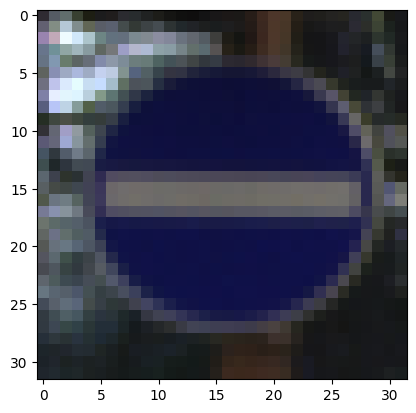

Do not Enter


/tmp/ipykernel_131445/202146463.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(label_dict[int(labels[i])])


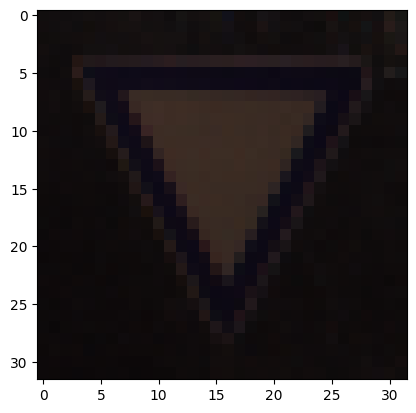

Yeild


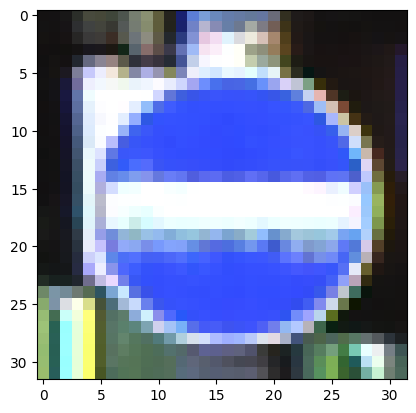

Do not Enter


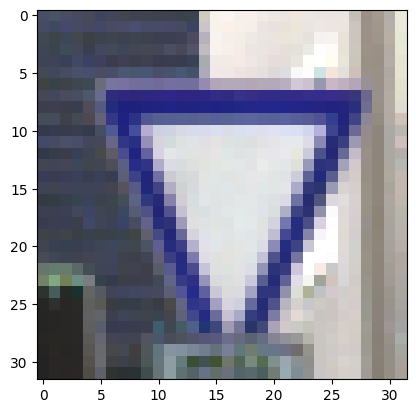

Yeild


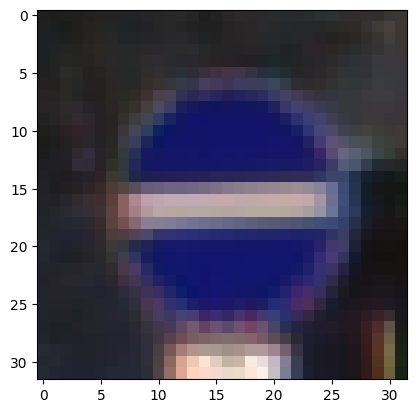

Do not Enter


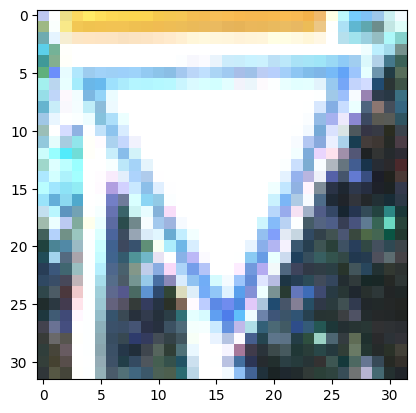

Yeild


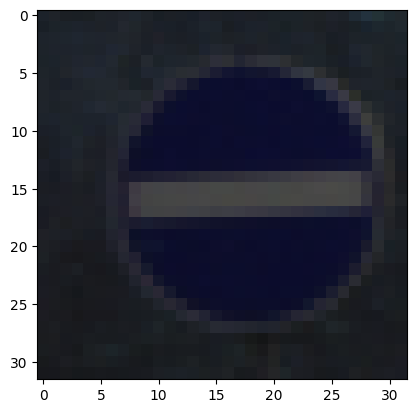

Do not Enter


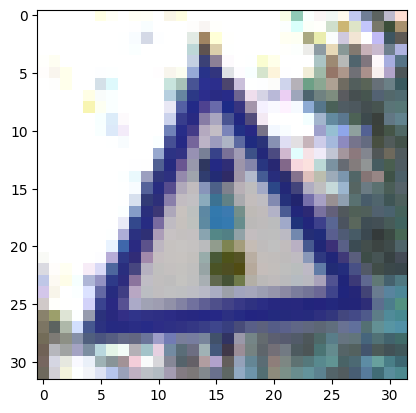

Traffic jam is close


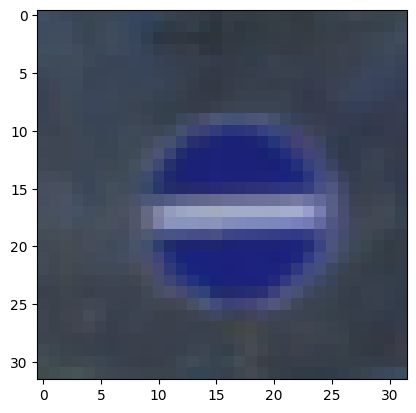

Do not Enter


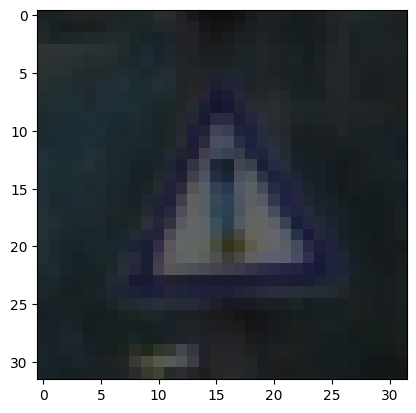

Traffic jam is close


In [ ]:
label_dict = {0:'Stop', 1:'Do not Enter', 2:'Traffic jam is close', 3:'Yeild'}
for i in range(10):
    plt.imshow(images[i])
    plt.show()
    print(labels[i])

In [32]:
mu = np.mean(images)
std = np.std(images)
print("The Mean = ",mu)
print("The Standard Deviation = ",std)

The Mean =  92.76090038004678
The Standard Deviation =  73.10418571479909


In [33]:
m = images.shape[0]
imageShape = images.shape[1:]

In [35]:
!pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 51.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 83.2 MB/s eta 0:00:00:00:0100:01


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("Count of Training Example = ",x_train.shape[0])
print("Count of Validation Example = ",x_test.shape[0])

Count of Training Example =  3791
Count of Validation Example =  948


In [44]:
def convert_to_greyscale(image):
    """
    Formula used: G = 0.2989 * R + 0.5870 * G + 0.1140 * B
    """

    if image.shape[-1] == 3:  # Check if it's a color image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    grey_image = 0.2989 * R + 0.5870 * G + 0.1140 * B
    grey_image = np.uint8(grey_image)

    return grey_image

def binary_threshold_no_cv(image, threshold_value=127):
    """
    Convert an image to binary using manual thresholding.
    
    :param image: The input image (grayscale).
    :param threshold_value: The threshold value to classify pixels as either black or white.
    :return: Binary thresholded image.
    """
    if isinstance(image, Image.Image):
        image = np.array(image)

    binary_image = np.zeros_like(image, dtype=np.uint8)
    
    for i in range(image.shape[0]):  # iterate over rows
        for j in range(image.shape[1]):  # iterate over columns
            if image[i, j] > threshold_value:
                binary_image[i, j] = 255  # Set pixel to white
            else:
                binary_image[i, j] = 0    # Set pixel to black

    return binary_image

In [42]:
imgs=[]
for i in range(100):
    imgs.append(convert_to_greyscale(images[i]))
imgsGray=np.array(imgs)
imgsColor=images[0:100]

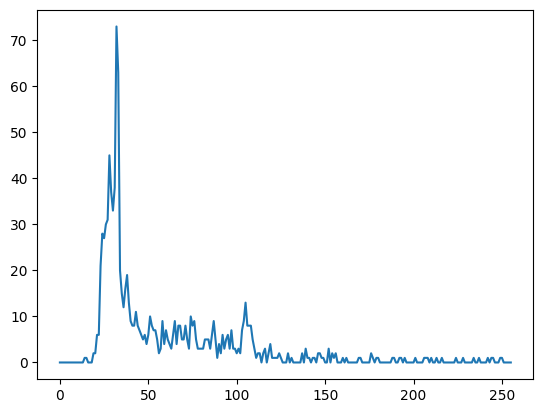

In [43]:
hist=cv2.calcHist([imgsGray[0]],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

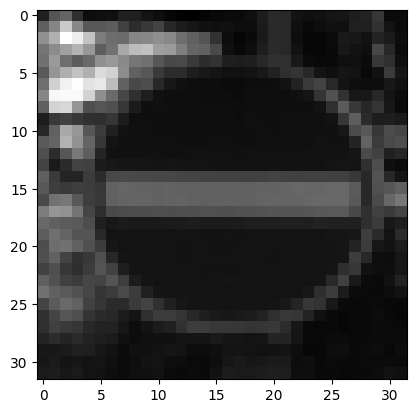

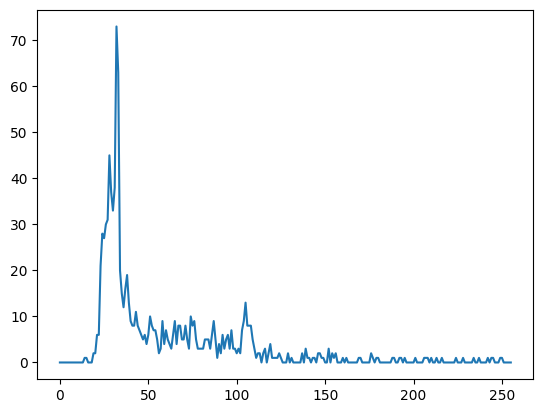

--------------------------------------------


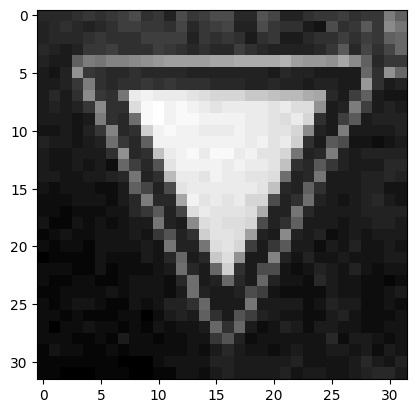

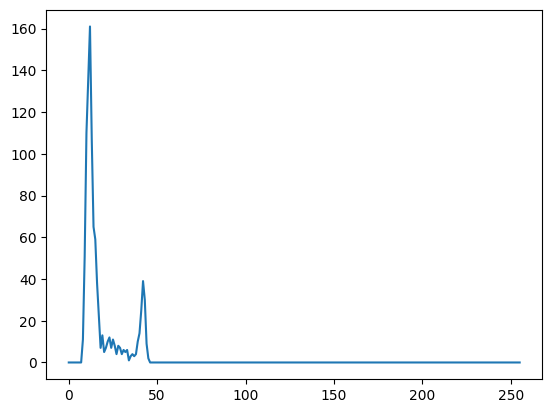

--------------------------------------------


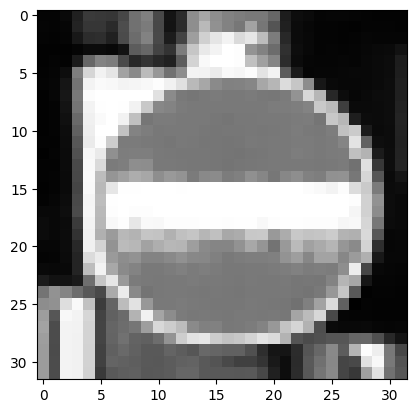

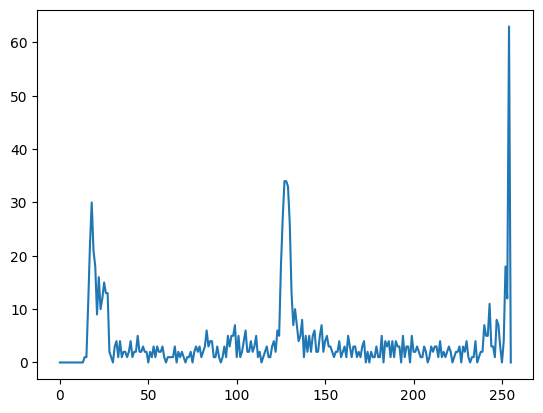

--------------------------------------------


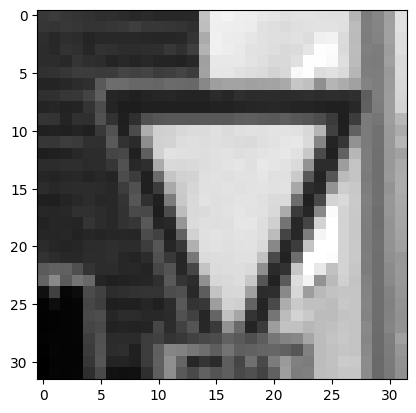

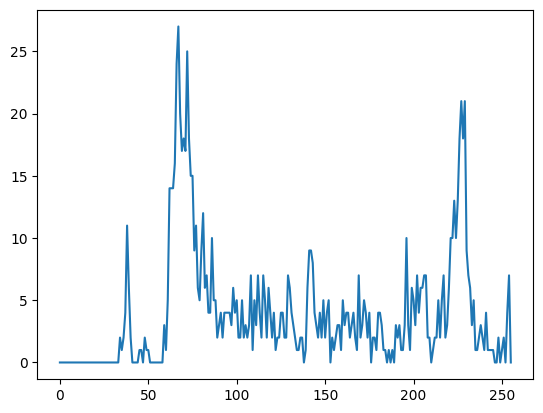

--------------------------------------------


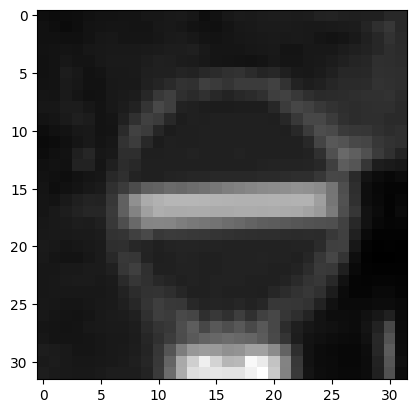

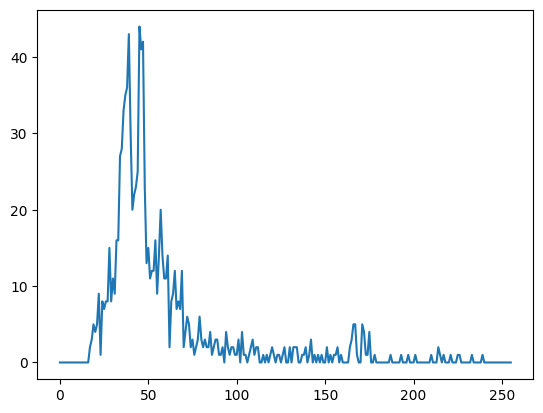

--------------------------------------------


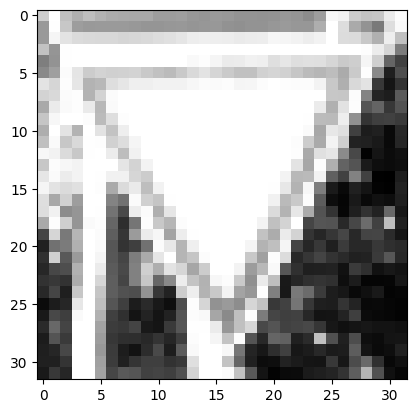

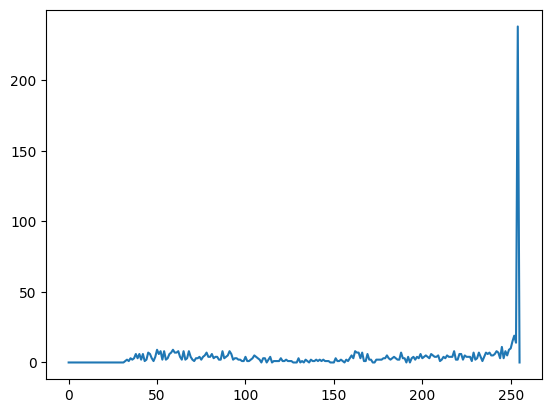

--------------------------------------------


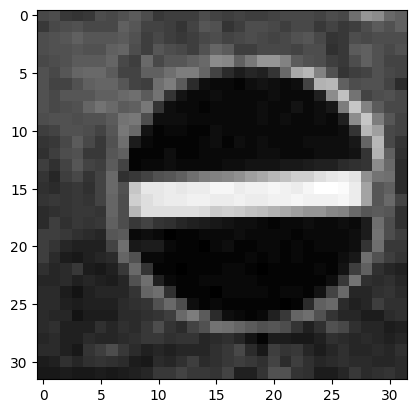

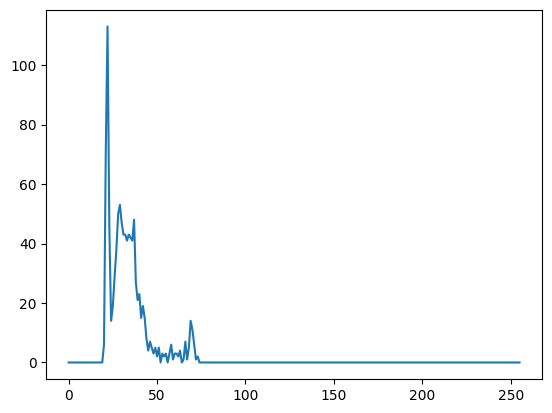

--------------------------------------------


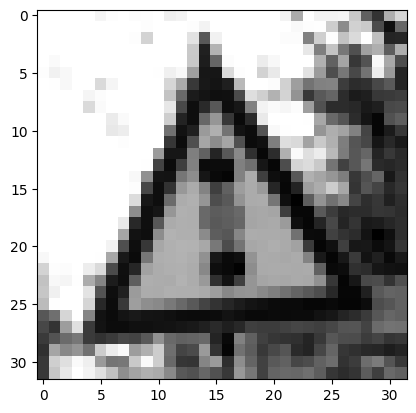

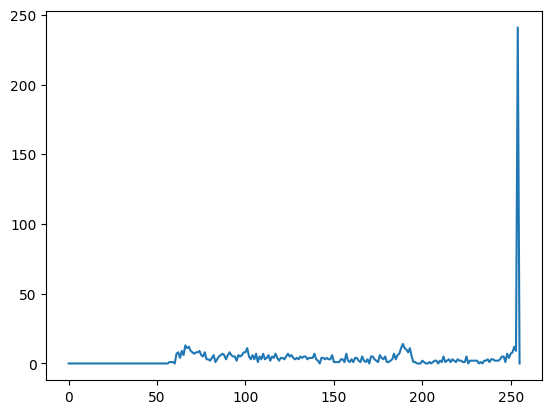

--------------------------------------------


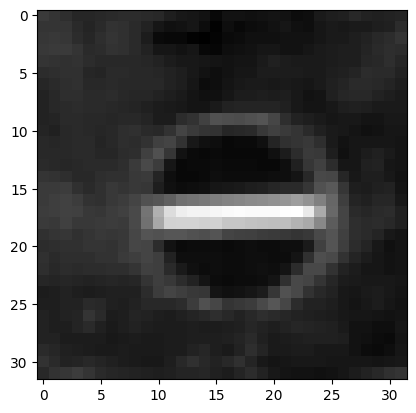

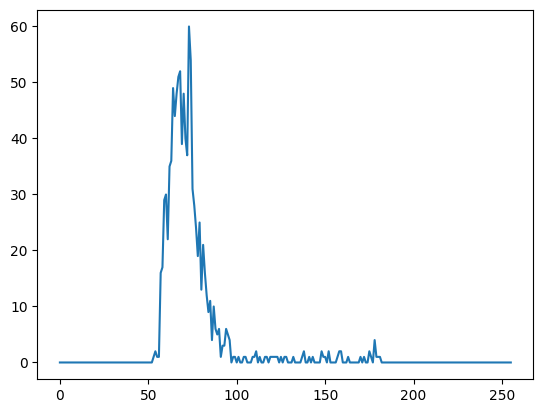

--------------------------------------------


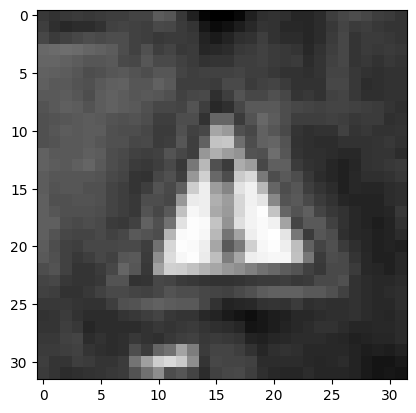

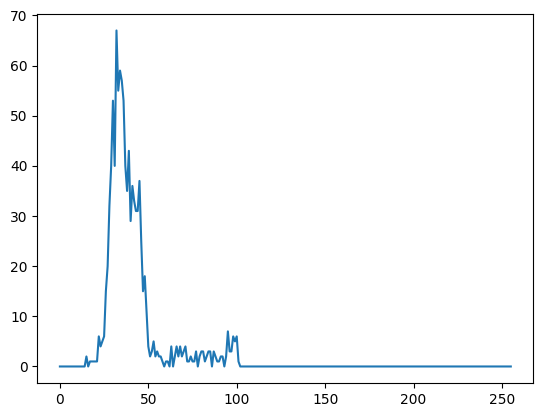

--------------------------------------------


In [40]:
for i in range(10):
    hist=cv2.calcHist([imgsGray[i]],[0],None,[256],[0,256])
    plt.imshow(imgsGray[i],cmap='gray')
    plt.show()
    plt.plot(hist)
    plt.show()
    print("--------------------------------------------")

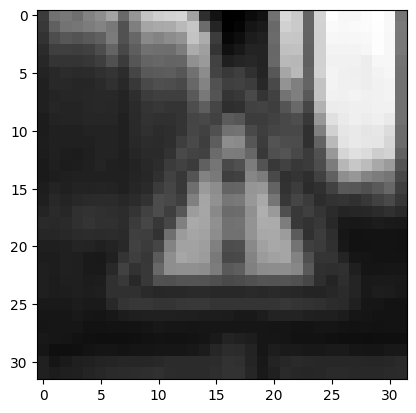

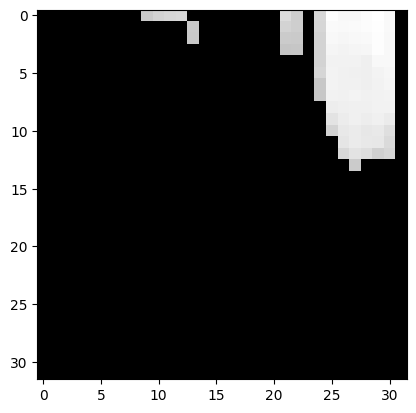

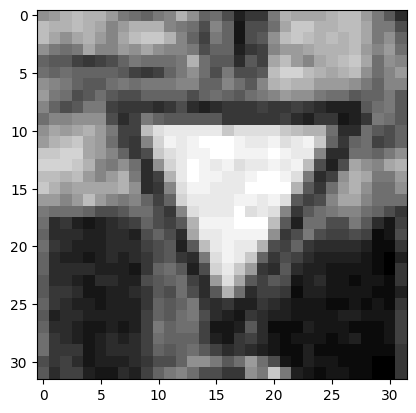

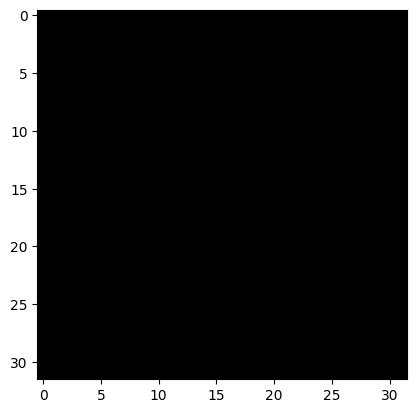

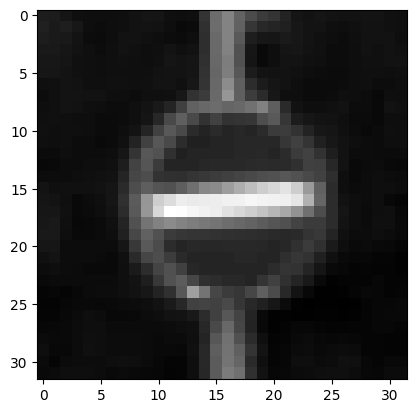

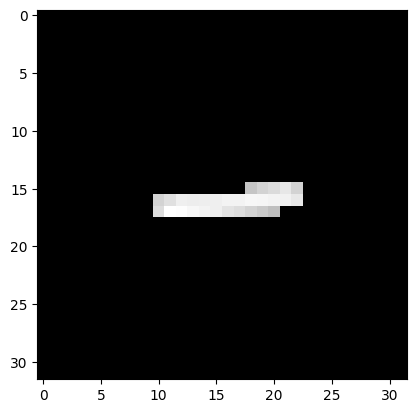

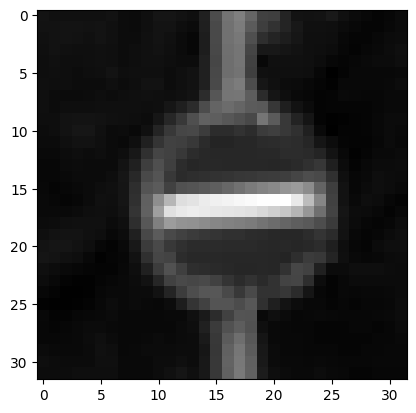

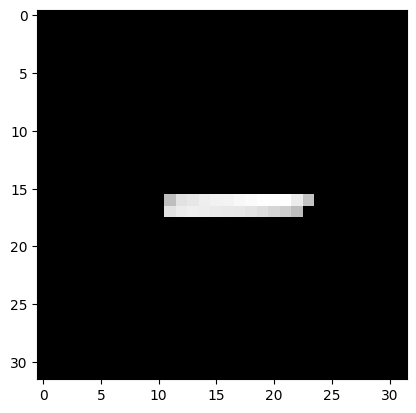

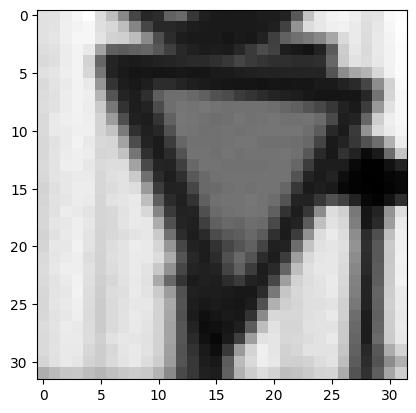

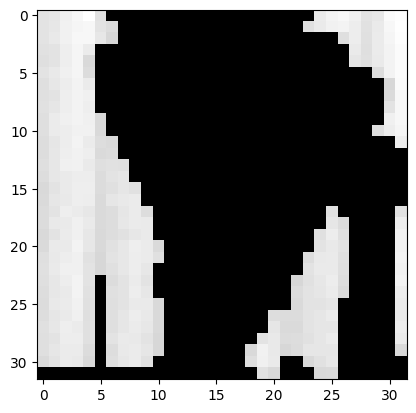

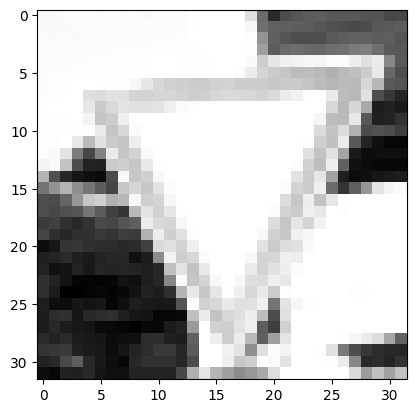

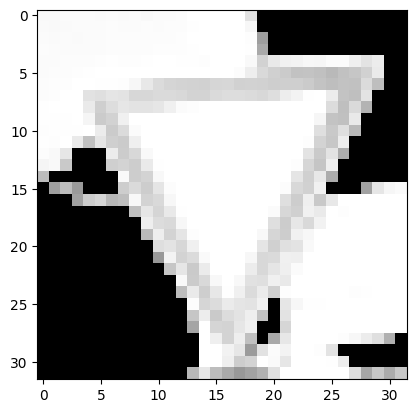

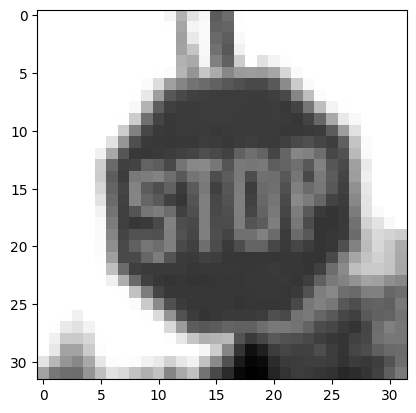

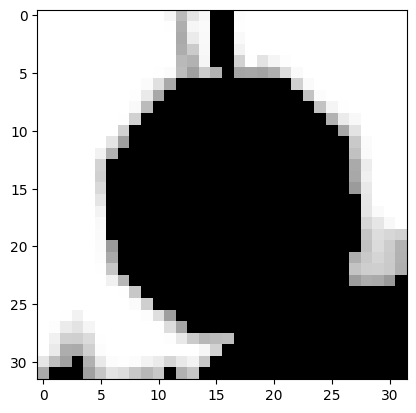

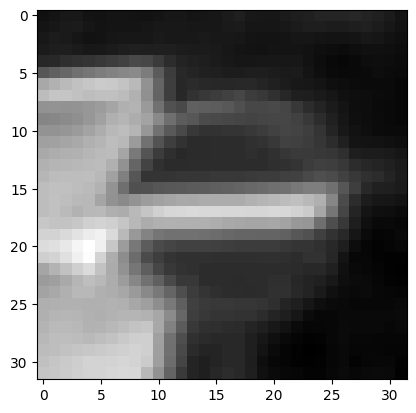

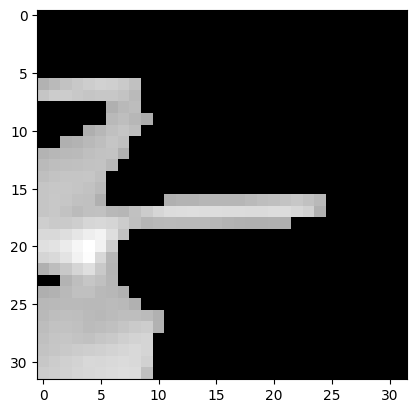

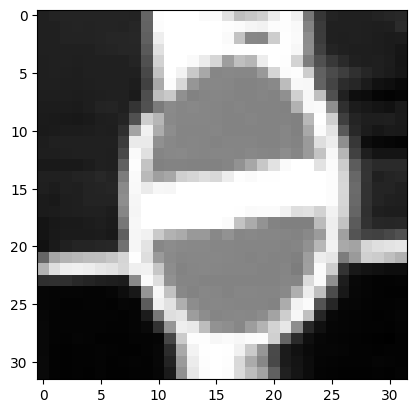

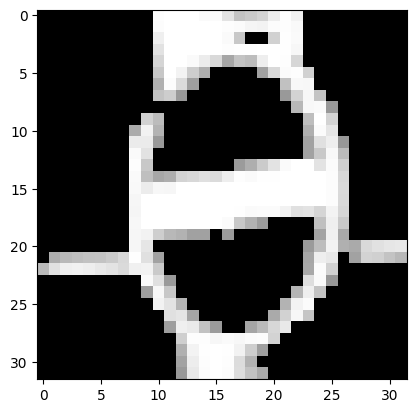

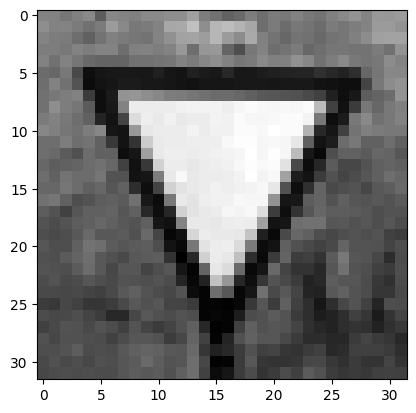

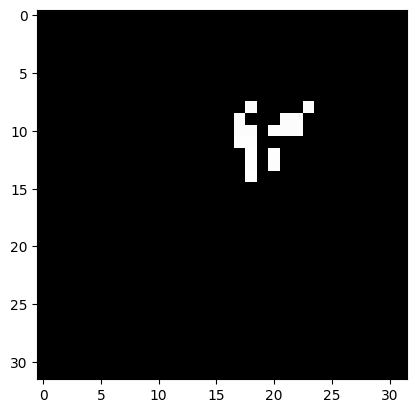

In [48]:
for i in range(20,30):
    plt.imshow(imgsGray[i],cmap='gray')
    plt.show()
    _,thresold=cv2.threshold(imgsGray[i],150,255,cv2.THRESH_TOZERO)
    plt.imshow(thresold,cmap='gray')
    plt.show()